<a href="https://colab.research.google.com/github/berthaass/tugas-python-10/blob/main/Tugas%20Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [18]:
ls

 dataset/            'tugaspy (2).ipynb'  'tugaspy (6).ipynb'
 forest_natu846.jpg  'tugaspy (3).ipynb'  'tugaspy (7).ipynb'
 nnmodel_scene@      'tugaspy (4).ipynb'   tugaspy.ipynb
'tugaspy (1).ipynb'  'tugaspy (5).ipynb'  'tugas python'/


In [20]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [23]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [24]:
for imagePath in imagePaths:
	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0
	data.append(image)
	
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [25]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [26]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [27]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [28]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(435, 128, 128, 3)
(146, 128, 128, 3)


In [78]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(4, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(48, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 126, 126, 4)       112       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 61, 61, 48)        1776      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 30, 30, 48)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 43200)             0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               4320100   
_________________________________________________________________
dense_23 (Dense)             (None, 5)               

In [79]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [80]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 4s 297ms/step - loss: 1.9381 - accuracy: 0.2207 - val_loss: 1.5176 - val_accuracy: 0.3630
Epoch 2/25
14/14 [==============================] - 4s 288ms/step - loss: 1.3817 - accuracy: 0.4874 - val_loss: 1.2007 - val_accuracy: 0.6027
Epoch 3/25
14/14 [==============================] - 4s 288ms/step - loss: 1.0716 - accuracy: 0.6092 - val_loss: 0.9257 - val_accuracy: 0.6301
Epoch 4/25
14/14 [==============================] - 4s 290ms/step - loss: 0.8013 - accuracy: 0.6920 - val_loss: 0.8234 - val_accuracy: 0.6849
Epoch 5/25
14/14 [==============================] - 4s 288ms/step - loss: 0.6579 - accuracy: 0.7609 - val_loss: 0.6766 - val_accuracy: 0.7671
Epoch 6/25
14/14 [==============================] - 4s 288ms/step - loss: 0.5128 - accuracy: 0.8115 - val_loss: 0.6711 - val_accuracy: 0.7603
Epoch 7/25
14/14 [==============================] - 4s 290ms/step - loss: 0.4284 - accuracy: 0.8529 - val_loss: 0.6979 - val_accuracy: 0.7466
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


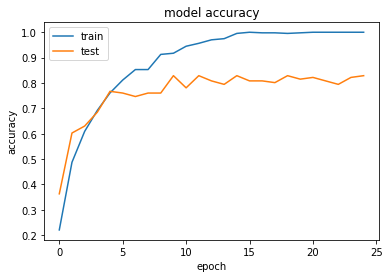

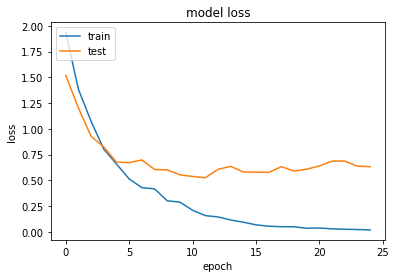

In [81]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.81      0.85      0.83        26
      GMB_03       0.78      0.81      0.79        26
      GMB_06       0.68      0.74      0.71        31
      GMB_08       0.93      0.84      0.88        31
      GMB_09       0.97      0.91      0.94        32

    accuracy                           0.83       146
   macro avg       0.83      0.83      0.83       146
weighted avg       0.84      0.83      0.83       146



In [84]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [85]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200814_131007_HDR.jpg'

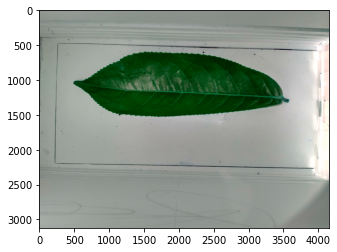

In [86]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [87]:
image_testing = Image.open('IMG_20200814_131007_HDR.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [88]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [89]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.8130794e-02 9.6428961e-01 7.5132251e-05 5.4850610e-04 6.9558378e-03]]
['GMB_03']
